In [183]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st


In [184]:
L_O=-45       #Longitude Hora Legal
L =-96.0419  #Longitude 
L_a= 41.2647   #Latitude
Beta=0           #Inclinação 
GSC=1.367         #Constante solar  KW/m^2

In [185]:
df=pd.read_csv("Dados Segundo exercicio.csv" , encoding ='UTF-8' , sep=";")




NUMERO DO DIA NO ANO

In [186]:
df['n']= df['Dia']  + (df['Mês'] -1)*30 +df['Cor']


CALCULO DA HORA SOLAR 

In [187]:
df['B']= (360/364)*(df['n']-81)

In [188]:
df['E']= 9.87*np.sin(np.radians(2*df['B']))-7.53*np.cos(np.radians(df['B']))-1.5*np.sin(np.radians(df['B']))

In [189]:
df['Corhora']= (4*(L_O-L)+df['E'])/60

In [190]:
HL=09.00


In [191]:
df['HS']= HL+df['Corhora']


ÂNGULO HORARIO

In [192]:
df['Omega']= (df['HS']-12)*15

DECLINAÇÃO SOLAR 

In [193]:
df['sigma']= 23.45*np.sin(np.radians(360/365*(284+df['n'])))

ÂNGULO ZENITAL 

In [194]:
df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(df['sigma']))*(np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega'])))))



ÂNGULO DE INCIDENCIA 

In [195]:
df['teta']=np.degrees(np.arccos(np.cos(np.radians(L_a+Beta)*np.cos(np.radians(df['sigma']))*np.cos(np.radians(df['Omega']))+np.sin(np.radians(L_a+Beta))*np.sin(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTE SOBRE UMA SUPERFICIE HORIZONTAL EM UM PONTO DA TERRA

In [196]:
df['GO']=GSC*(1+0.033*np.cos(np.radians((360*df['n'])/365)))*np.cos(np.radians(df['teta_z']))


ÂNGULO HORÁRIO DO PÔR DO SOL 

In [197]:
df['omega_s']=np.degrees(np.arccos((-np.tan(np.radians(L_a))*np.tan(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTRE INTEGRADA HORARI SOBRE SUPERFICIE HORIZONTAL 

In [198]:
df['HO']=((2.75*10**4)*GSC*((1+0.033*np.cos(np.radians((360*df['n'])/365))))*(((1.75*10**-2)*df['omega_s']*np.sin(np.radians(df['sigma']))*np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.sin(np.radians(df['omega_s'])))))/1000


In [199]:
df['H']=pd.read_csv("Irradiação integrada diaria.csv" , encoding ='UTF-8' , sep=";")


In [200]:
df['KT']=df['H']/df['HO']
df['KT']

0     0.597165
1     0.586144
2     0.555006
3     0.565694
4     0.542612
5     0.564324
6     0.585219
7     0.600395
8     0.562714
9     0.563389
10    0.530442
11    0.540804
Name: KT, dtype: float64

In [201]:
df['Hd/H1']=1.118-2.272*df['KT']+9.473*df['KT']**2-21.865*df['KT']**3+14.648*df['KT']**4
df['Hd/H1']

0     0.345916
1     0.366732
2     0.426837
3     0.406074
4     0.450948
5     0.408731
6     0.368496
7     0.339886
8     0.411856
9     0.410544
10    0.474553
11    0.454462
Name: Hd/H1, dtype: float64

In [202]:
df['Hd/H']=0.775+0.0065*(df['omega_s']-90)-(0.505+0.00455*(df['omega_s']-90))*np.cos(np.radians(115*df['KT']-103))
df['Hd/H']

0     0.304214
1     0.331745
2     0.377199
3     0.401117
4     0.444467
5     0.441734
6     0.420660
7     0.389144
8     0.384323
9     0.353237
10    0.345147
11    0.325766
Name: Hd/H, dtype: float64

In [203]:
df['Hd']=df['Hd/H']*df['H']


In [204]:
df['Hb']=df['H']-df['Hd']


Text(0, 0.5, 'Irradiação Solar ')

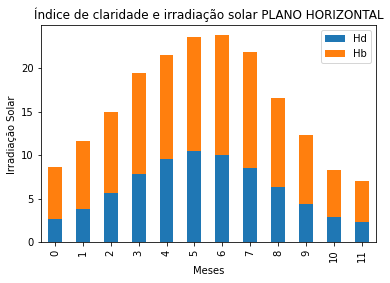

In [205]:
df[["Hd", "Hb", ]].plot(kind="bar", stacked=True)
plt.title("Índice de claridade e irradiação solar PLANO HORIZONTAL")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

Superficie no hemisferio Sul  

In [206]:
Beta_incli=40

In [207]:
df['omega_s*']=np.degrees(np.arccos((-np.tan(np.radians(L_a-Beta_incli))*np.tan(np.radians(df['sigma'])))))


In [208]:
df['Rb']=(np.cos(np.radians(L_a-Beta_incli))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s*']))+(np.pi/180)*df['omega_s*']*np.sin(np.radians(L_a-Beta_incli))*np.sin(np.radians(df['sigma'])))/(np.cos(np.radians(L_a))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s']))+(np.pi/180)*df['omega_s']*np.sin(np.radians(L_a))*np.sin(np.radians(df['sigma'])))


In [209]:
rho=0.2

In [210]:
df['R']=(1-df['Hd/H'])*df['Rb']+df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))
df['R']

0     2.015025
1     1.569876
2     1.234081
3     1.024109
4     0.909712
5     0.867863
6     0.885218
7     0.973011
8     1.140780
9     1.434620
10    1.829334
11    2.136270
Name: R, dtype: float64

In [211]:
df['HT']=df['R']*df['H']
df['HT']

0     17.329216
1     18.210559
2     18.387812
3     19.867716
4     19.558804
5     20.481559
6     21.068197
7     21.211640
8     18.936949
9     17.645827
10    15.183475
11    14.953888
Name: HT, dtype: float64

In [212]:
df['HTb']=(1-df['Hd/H'])*df['Rb']*df['H']


In [213]:
df['HTd']=df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)*df['H']


In [214]:
df['HTr']=rho*(((1-np.cos(np.radians(Beta_incli)))/2))*df['H']


Text(0, 0.5, 'Irradiação Solar ')

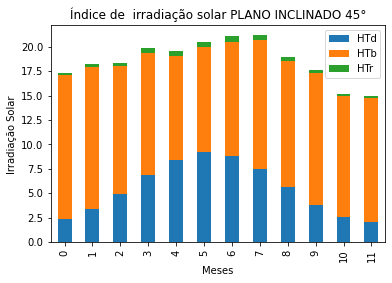

In [215]:
df[["HTd", "HTb", "HTr"]].plot(kind="bar", stacked=True)
plt.title("Índice de  irradiação solar PLANO INCLINADO 45°")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

In [216]:
df1=pd.DataFrame({"Mês":df['Mês'],"Omega_s*":df['omega_s*'],"Rb*":df['Rb'],"R":df['R'],"HT":df['HT'],"HTd":df['HTd'],"HTb":df['HTb'],"HTr":df['HTr']})


In [217]:
df['a']= 0.409 + 0.5016*np.sin(np.radians(df['omega_s']-60))
df['b']=0.6609-0.4767*np.sin(np.radians(df['omega_s']-60))

In [218]:
df['r_dn']=(np.pi/24)*((np.cos(np.radians(df['Omega']))-np.cos(np.radians(df['omega_s'])))/(np.sin(np.radians(df['omega_s']))-((np.pi/180)*df['omega_s']*np.cos(np.radians(df['omega_s'])))))


In [219]:
df['r_tn']=(np.pi/24)*(df['a']+df['b']*np.cos(np.radians(df['Omega'])))*((np.cos(np.radians(df['Omega']))-np.cos(np.radians(df['omega_s'])))/(np.sin(np.radians(df['omega_s']))-np.pi/180*df['omega_s']*np.cos(np.radians(df['omega_s']))))
 

In [220]:
df['r_dn/r_tn']=df['r_dn']/df['r_tn']


In [221]:
df['R_bn']=np.absolute(np.cos(np.radians(L_a-df['sigma']-Beta_incli)))/np.absolute(np.cos(np.radians(L_a-df['sigma'])))
 

In [222]:
df['R_n']=(1-df['r_dn/r_tn']*df['Hd/H'])*df['R_bn']+df['r_dn/r_tn']*df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))


In [223]:
df['R/R_n']=df['R_n']/df['R']
 

df=pd.read_csv("temperatura externa.csv" , encoding ='UTF-8' , sep=";")


In [224]:
Fr_UL=2.63
A_c=50.0
Fr_taualpha=0.72
Q=16.1**9
df['taualpha/taualphan']=0.94

In [225]:
df['delta_i']=86400*30


df1=pd.read_csv("temperatura externa.csv" , encoding ='UTF-8' , sep=";")

In [226]:
df['X_i']=(A_c*Fr_UL*(31*24)*100)/(12000*12*31)
 

In [227]:
Q1=(16.1)**3

In [228]:
df['Y_i']=(A_c*Fr_taualpha*df['taualpha/taualphan']*df['HT']*31*10**6)/(12000*12*3600*31)
 

In [298]:
df['f']=1.029-0.065*df['X_i']-0.245*df['Y_i']**2+0.0018**2+0.025*df['Y_i']


In [297]:
df2=pd.DataFrame({"Y_i":df['Y_i'],"X_i":df['X_i'],"f":df['f']})


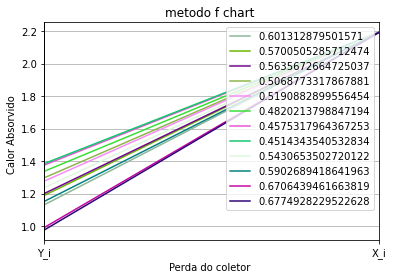

In [296]:

from pandas.plotting import parallel_coordinates

parallel_coordinates(df2, 'f')
plt.title("metodo f chart ")
plt.xlabel("Perda do coletor ")
plt.ylabel("Calor Absorvido  ")
plt.show()